In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tensorflow_root = '/home/albert/github/tensorflow/models/'
model_root = 'densenet_triplet_margin_preprocess'
train_score = np.load(tensorflow_root + '%s/%s_score.npz' % (model_root, model_root))['arr_0'].item()
test_score = np.load(tensorflow_root + '%s/%s_test_score.npz' % (model_root, model_root))['arr_0'].item()

In [3]:
train_rank1_avg = []
train_rank5_avg = []
train_rank20_avg = []
test_rank1_avg = []
test_rank5_avg = []
test_rank20_avg = []

iterations = 20000

for it in range(1000, iterations + 1000, 1000):
    train_rank1_avg.append(np.average(np.array(train_score['rank1'][it])))
    train_rank5_avg.append(np.average(np.array(train_score['rank5'][it])))
    train_rank20_avg.append(np.average(np.array(train_score['rank20'][it])))
    test_rank1_avg.append(np.average(np.array(test_score['rank1'][it])))
    test_rank5_avg.append(np.average(np.array(test_score['rank5'][it])))
    test_rank20_avg.append(np.average(np.array(test_score['rank20'][it])))

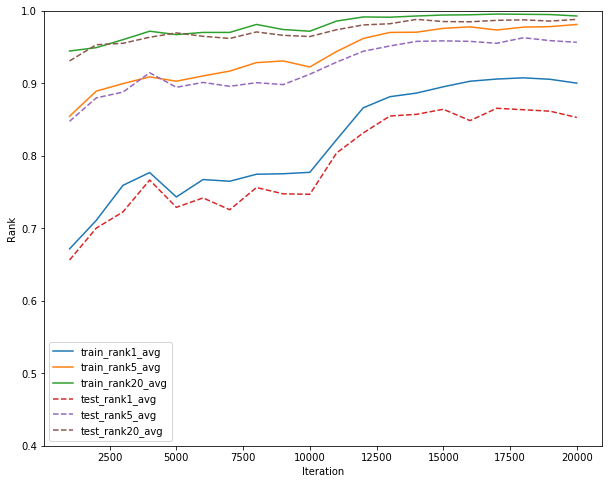

In [4]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1000,iterations+1000,1000), train_rank1_avg, label='train_rank1_avg', )
plt.plot(np.arange(1000,iterations+1000,1000), train_rank5_avg, label='train_rank5_avg', )
plt.plot(np.arange(1000,iterations+1000,1000), train_rank20_avg, label='train_rank20_avg')

plt.plot(np.arange(1000,iterations+1000,1000), test_rank1_avg, label='test_rank1_avg', linestyle='--')
plt.plot(np.arange(1000,iterations+1000,1000), test_rank5_avg, label='test_rank5_avg', linestyle='--')
plt.plot(np.arange(1000,iterations+1000,1000), test_rank20_avg, label='test_rank20_avg', linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Iteration')
plt.ylabel('Rank')
plt.ylim(0.4,1.0)
plt.show()